<a href="https://colab.research.google.com/github/sandeep1847e/MSc-Project/blob/main/plots/Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#source myenv/bin/activate


In [ ]:
import uproot
import awkward as ak
import matplotlib.pyplot as plt
import numpy as np
import torch
import awkward as ak

In [ ]:
file = uproot.open("pp24tops.root")


In [ ]:
file.keys()


['ProcessID0;1', 'Delphes;1']

In [ ]:
tree = file["Delphes;1"]
# tree.keys()

In [ ]:
import time
# 'FatJet/FatJet.PT',
#  'FatJet/FatJet.Eta',
#  'FatJet/FatJet.Phi',


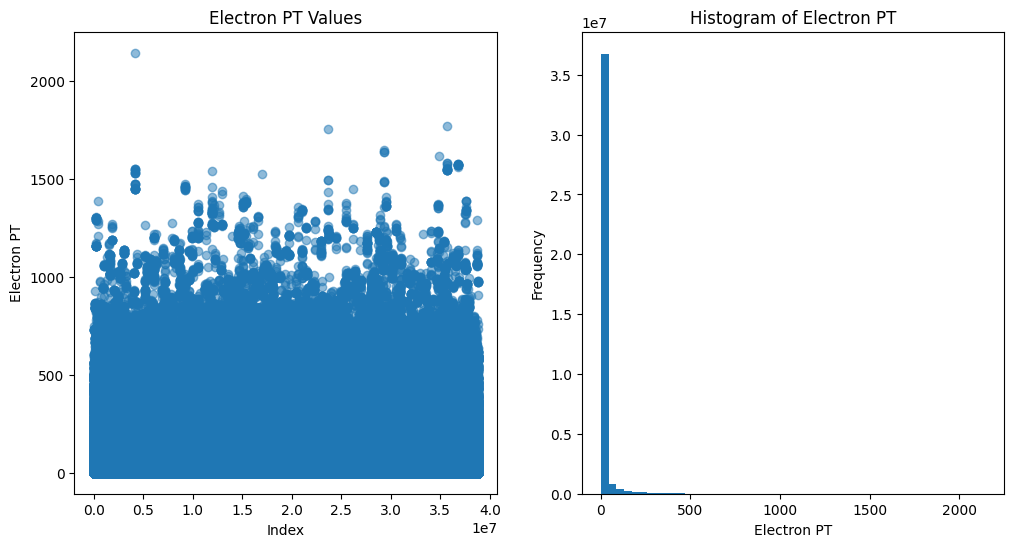

In [ ]:
electron = tree["Particle/Particle.PT"].array()
tic1= time.time()
# Flatten the array and remove any None values
electron_flat = ak.flatten(electron)
tic2= time.time()
# Convert to numpy for plotting
electron_np = torch.tensor(ak.to_numpy(electron_flat))
tic3= time.time()
# Line plot of the electron PT data
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)  # Create a subplot for line plot
plt.plot(electron_np, marker='o', linestyle='', alpha=0.5)  # Scatter plot with markers
plt.xlabel('Index')
plt.ylabel('Electron PT')
plt.title('Electron PT Values')
tic4= time.time()
# Histogram of the electron PT data
plt.subplot(1, 2, 2)  # Create a subplot for histogram
plt.hist(electron_np, bins=50)  # Adjust the number of bins as needed
plt.xlabel('Electron PT')
plt.ylabel('Frequency')
plt.title('Histogram of Electron PT')
plt.show()
tic5= time.time()



In [ ]:
print((np.array([tic2-tic1,tic3-tic2,tic4-tic3,tic5-tic4]))*1000)

[2.21967697e-01 1.91228390e+01 8.67783070e+02 4.07928970e+04]


In [ ]:
# Count the total number of events
event_count = tree.num_entries
print(f"Total number of events: {event_count}")


Total number of events: 20000


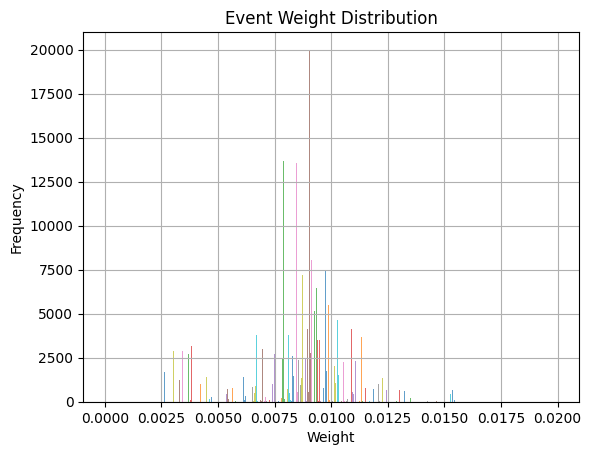

Mean Weight: 0.007878267471104452
Standard Deviation of Weight: 0.0027735781275730243


In [ ]:
# Extract weights
weights = tree["Weight.Weight"].array()

# Plot the distribution of weights
plt.hist(weights, bins=50, range=(0,0.02), alpha=0.7)  # Adjust range/bins as needed
plt.title("Event Weight Distribution")
plt.xlabel("Weight")
plt.ylabel("Frequency")
plt.grid()
plt.show()

# Calculate statistics
mean_weight = np.mean(weights)
stddev_weight = np.std(weights)

print(f"Mean Weight: {mean_weight}")
print(f"Standard Deviation of Weight: {stddev_weight}")


In [ ]:
# Extract Particle data as DataFrame
particles = tree.arrays("Particle", library="pd")

# Inspect the DataFrame's structure
print(particles.head())  # Display the first few rows
print(particles.columns)  # Display the column names


   Particle
0      1595
1      2267
2      1474
3      2352
4      2234
Index(['Particle'], dtype='object')


In [ ]:
# Load the electrons dataset
electrons = tree.arrays("Electron", library="pd")

# Display the columns and the first few rows
print(electrons.columns)
print(electrons.head())


Index(['Electron'], dtype='object')
   Electron
0         0
1         0
2         0
3         0
4         0


In [ ]:
# Check the structure of the Electron data
electron_data = electrons['Electron'].to_list()
print(electron_data[:5])  # Print the first 5 entries


[0, 0, 0, 0, 0]


In [ ]:
# Explore the structure of the event data
event_data = tree.arrays("Event", library="pd")
print(event_data.head())  # Display the first few entries


   Event
0      1
1      1
2      1
3      1
4      1


In [ ]:
# Retrieve all particle data
all_particles = tree.arrays("Particle", library="pd")
print(all_particles.head())  # Display the first few rows of the particle data
print(all_particles.columns)  # List all available columns for particles


   Particle
0      1595
1      2267
2      1474
3      2352
4      2234
Index(['Particle'], dtype='object')


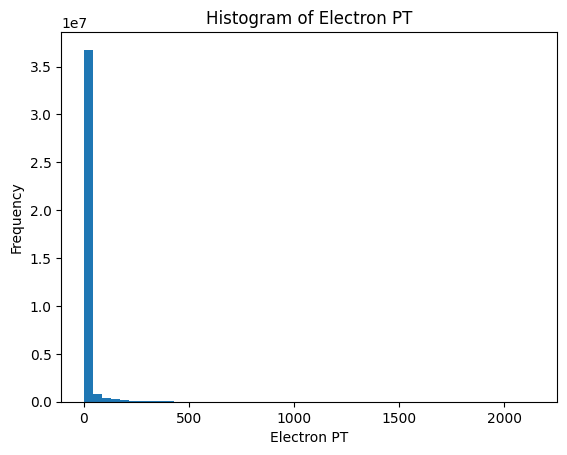

In [ ]:
# Access the PT data as an Awkward Array
electron = tree["Particle/Particle.PT"].array()

# Flatten the array and remove any None values
electron_flat = ak.flatten(electron)

# Convert to a NumPy array and then to a PyTorch tensor
electron_tensor = torch.tensor(ak.to_numpy(electron_flat))

# Calculate histogram
num_bins = 50
hist = torch.histc(electron_tensor, bins=num_bins, min=electron_tensor.min(), max=electron_tensor.max())

# Compute edges for the histogram
edges = torch.linspace(electron_tensor.min(), electron_tensor.max(), num_bins + 1).cpu().numpy()

# Plot the histogram
plt.hist(edges[:-1], edges, weights=hist.cpu().numpy())
plt.xlabel('Electron PT')
plt.ylabel('Frequency')
plt.title('Histogram of Electron PT')
plt.show()


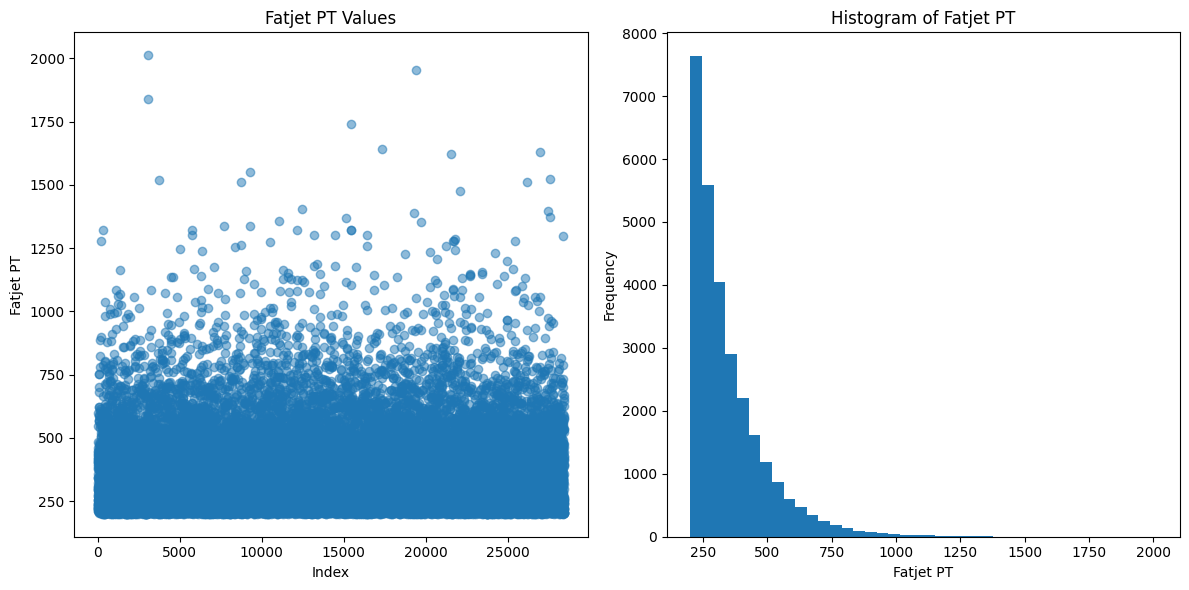

In [ ]:
# Access the PT data as an Awkward Array
fatjet_PT = tree["FatJet/FatJet.PT"].array()

# Flatten the array and remove any None values
fatjet_flat = ak.flatten(fatjet_PT)

# Convert to a NumPy array and then to a PyTorch tensor
fatjet_tensor = torch.tensor(ak.to_numpy(fatjet_flat))

# Calculate histogram
num_bins = 40
hist = torch.histc(fatjet_tensor, bins=num_bins, min=fatjet_tensor.min(), max=fatjet_tensor.max())

# Compute edges for the histogram
edges = torch.linspace(fatjet_tensor.min(), fatjet_tensor.max(), num_bins + 1).cpu().numpy()

# Plotting
plt.figure(figsize=(12, 6))

# Line plot of fatjet PT values
plt.subplot(1, 2, 1)
plt.plot(fatjet_tensor.cpu().numpy(), marker='o', linestyle='', alpha=0.5)  # Scatter plot with markers
plt.xlabel('Index')
plt.ylabel('Fatjet PT')
plt.title('Fatjet PT Values')

# Histogram plot
plt.subplot(1, 2, 2)
plt.hist(edges[:-1], edges, weights=hist.cpu().numpy())
plt.xlabel('Fatjet PT')
plt.ylabel('Frequency')
plt.title('Histogram of Fatjet PT')

plt.tight_layout()
plt.show()


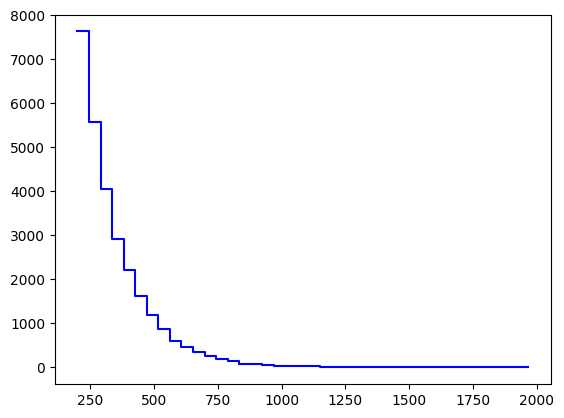

In [ ]:
plt.step(edges[:-1], hist.cpu().numpy(), where='post', color='blue')  # Unfilled histogram

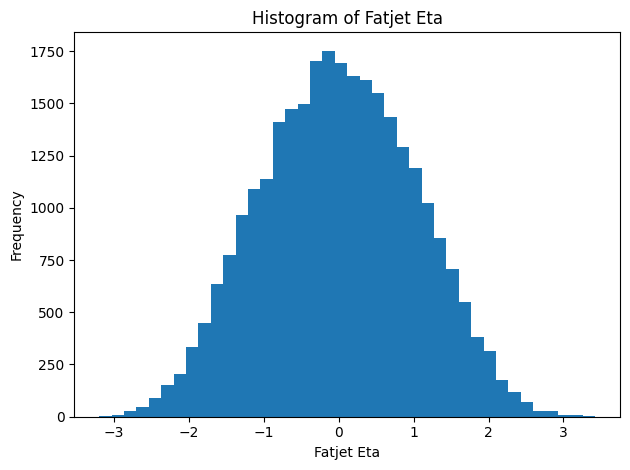

In [ ]:
# Access the PT data as an Awkward Array
fatjet_eta = tree["FatJet/FatJet.Eta"].array()

# Flatten the array and remove any None values
fatjet_flat = ak.flatten(fatjet_eta)

# Convert to a NumPy array and then to a PyTorch tensor
fatjet_tensor = torch.tensor(ak.to_numpy(fatjet_flat))

# Calculate histogram
num_bins = 40
hist = torch.histc(fatjet_tensor, bins=num_bins, min=fatjet_tensor.min(), max=fatjet_tensor.max())

# Compute edges for the histogram
edges = torch.linspace(fatjet_tensor.min(), fatjet_tensor.max(), num_bins + 1).cpu().numpy()

plt.hist(edges[:-1], edges, weights=hist.cpu().numpy())
plt.xlabel('Fatjet Eta')
plt.ylabel('Frequency')
plt.title('Histogram of Fatjet Eta')

plt.tight_layout()
plt.show()


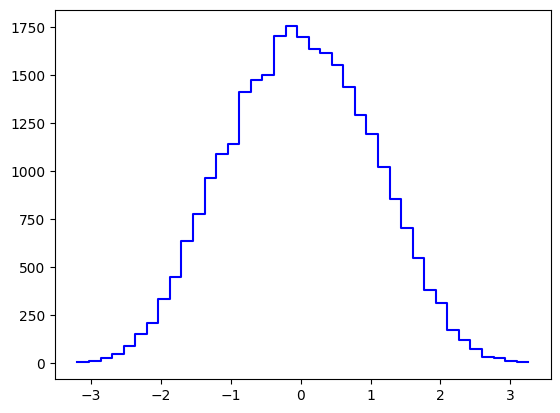

In [ ]:
plt.step(edges[:-1], hist.cpu().numpy(), where='post', color='blue')  # Unfilled histogram

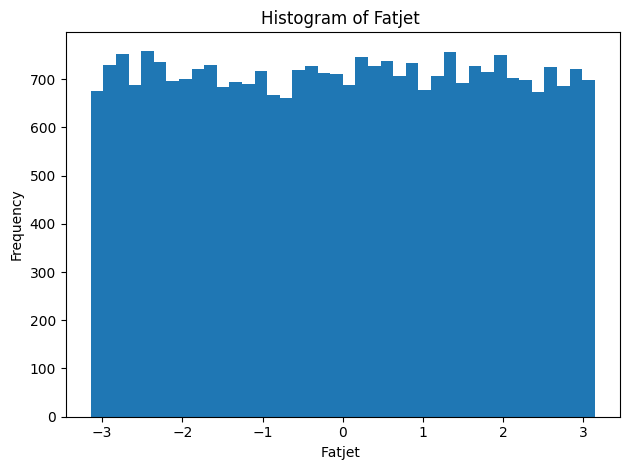

In [ ]:
# Access the PT data as an Awkward Array
fatjet_phi = tree["FatJet/FatJet.Phi"].array()

# Flatten the array and remove any None values
fatjet_flat = ak.flatten(fatjet_phi)

# Convert to a NumPy array and then to a PyTorch tensor
fatjet_tensor = torch.tensor(ak.to_numpy(fatjet_flat))

# Calculate histogram
num_bins = 40
hist = torch.histc(fatjet_tensor, bins=num_bins, min=fatjet_tensor.min(), max=fatjet_tensor.max())

# Compute edges for the histogram
edges = torch.linspace(fatjet_tensor.min(), fatjet_tensor.max(), num_bins + 1).cpu().numpy()

plt.hist(edges[:-1], edges, weights=hist.cpu().numpy())
plt.xlabel('Fatjet ')
plt.ylabel('Frequency')
plt.title('Histogram of Fatjet ')

plt.tight_layout()
plt.show()


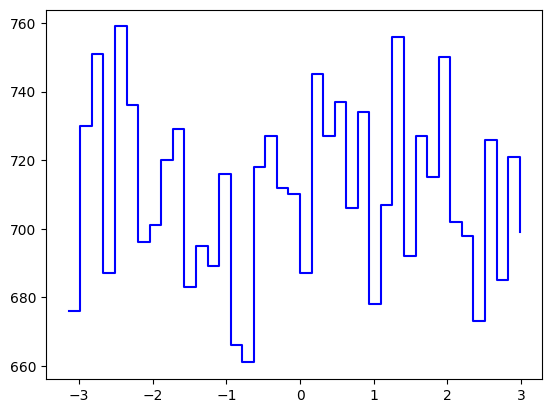

In [ ]:
plt.step(edges[:-1], hist.cpu().numpy(), where='post', color='blue')  # Unfilled histogram

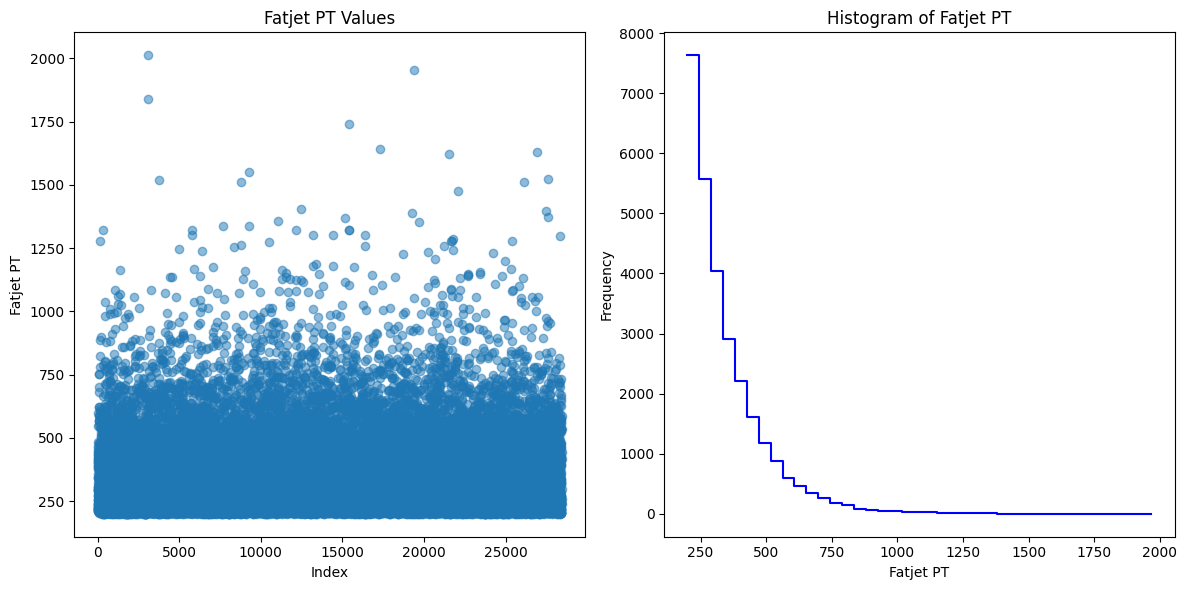

In [ ]:
import awkward as ak
import torch
import matplotlib.pyplot as plt

# Access the PT data as an Awkward Array
fatjet_PT = tree["FatJet/FatJet.PT"].array()

# Flatten the array and remove any None values
fatjet_flat = ak.flatten(fatjet_PT)

# Convert to a NumPy array and then to a PyTorch tensor
fatjet_tensor = torch.tensor(ak.to_numpy(fatjet_flat))

# Calculate histogram
num_bins = 40
hist = torch.histc(fatjet_tensor, bins=num_bins, min=fatjet_tensor.min(), max=fatjet_tensor.max())

# Compute edges for the histogram
edges = torch.linspace(fatjet_tensor.min(), fatjet_tensor.max(), num_bins + 1).cpu().numpy()

# Plotting
plt.figure(figsize=(12, 6))

# Line plot of fatjet PT values
plt.subplot(1, 2, 1)
plt.plot(fatjet_tensor.cpu().numpy(), marker='o', linestyle='', alpha=0.5)  # Scatter plot with markers
plt.xlabel('Index')
plt.ylabel('Fatjet PT')
plt.title('Fatjet PT Values')

# Unfilled histogram plot
plt.subplot(1, 2, 2)
plt.step(edges[:-1], hist.cpu().numpy(), where='post', color='blue')  # Unfilled histogram
plt.xlabel('Fatjet PT')
plt.ylabel('Frequency')
plt.title('Histogram of Fatjet PT')

plt.tight_layout()
plt.show()
